In [18]:
#Importing Required Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing Training Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [20]:
#Visualizing first 5 rows of dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
#Shape of the above dataset:
df.shape

(614, 13)

In [24]:
# columns show the columns of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
#head shows first five rows of the data:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
#tail shows last five rows of the data:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Lot of object columns are present, we need to convert them later into numerical data.

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [27]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
# types of the data:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Remove Missing Values

<AxesSubplot:>

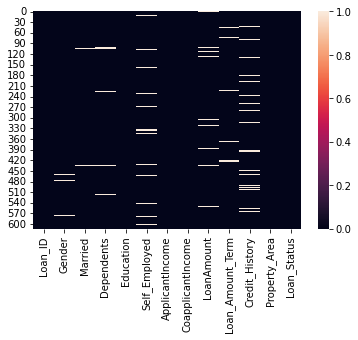

In [30]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the black color shows the '0' value here, it means that none of the value is emmpty(Null Values).

Where as we can see some of the white lines in the heat map that shows the presence of nan values in the given data set.

We will be treating these values.

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 '

In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Number of Nan values present in the dataset

In [32]:
df["Gender"] = df["Gender"].fillna(df["Gender"].dropna().mode().values[0] )

In [33]:
df["Married"] = df["Married"].fillna(df["Married"].dropna().mode().values[0] )

In [34]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].dropna().mode().values[0] )

In [35]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].dropna().mode().values[0] )

In [36]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].dropna().median() )

In [37]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].dropna().mode().values[0] )

In [38]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].dropna().mode().values[0] )

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 we do not have any missing values in our data:

Finding the Uniqueness in some of the data for double check:

In [40]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [41]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [43]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [44]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


There were missing values in the above data and we have treated also the same. we are reviewing here the count of each fields, mean , standard deviation minimum value and maximum value too , if we review the loan amount in the above data then we could see that the min loan amout is 9 where as max is 700.thus we could also see the mean and median values here.

# Data Visualization

In [45]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

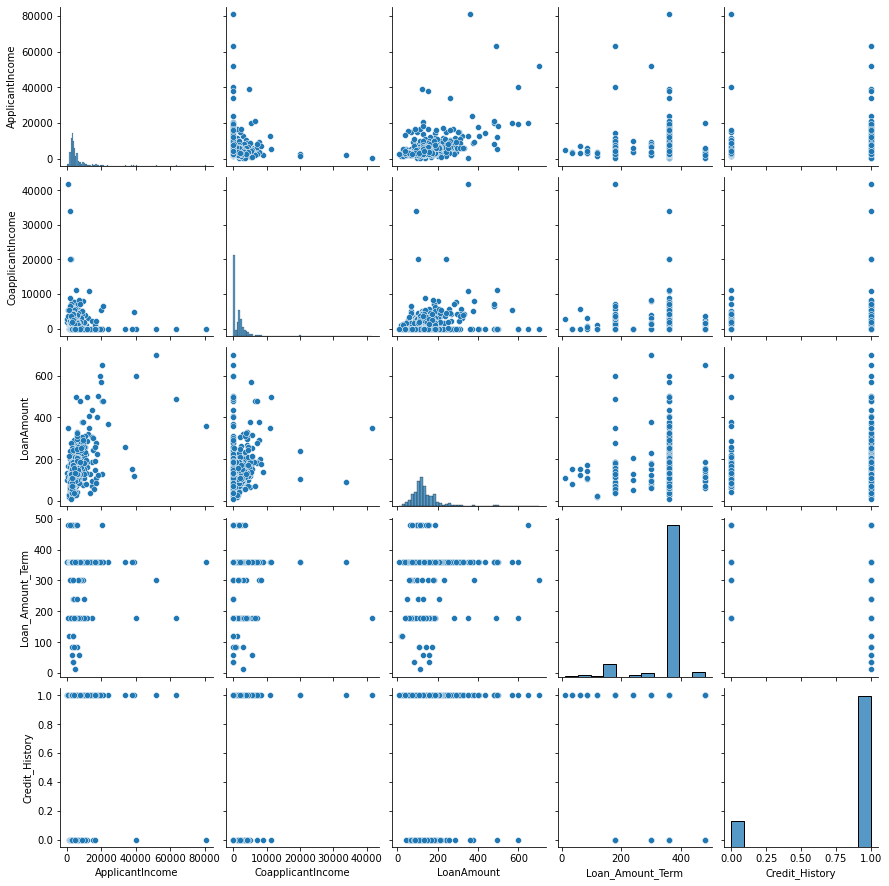

In [46]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'

These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation. There are field which are negative relationship, hence we will be removing 'CoapplicantIncome' .

We will remove this field before modeling our data.

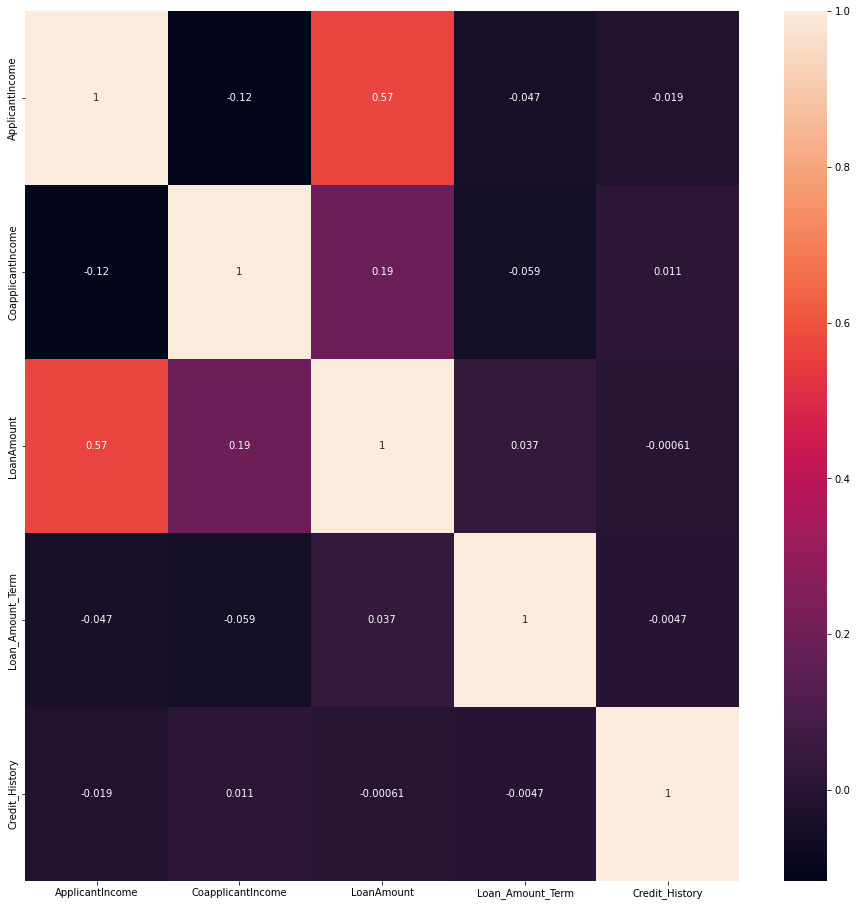

In [47]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

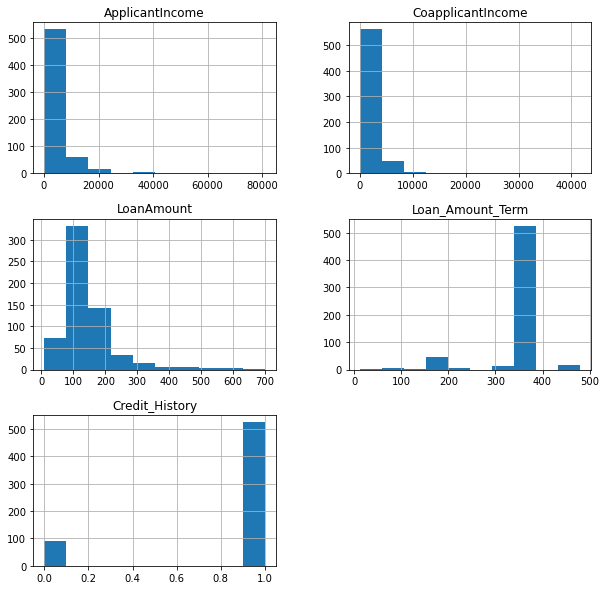

In [48]:
df.hist(figsize=(10,10))

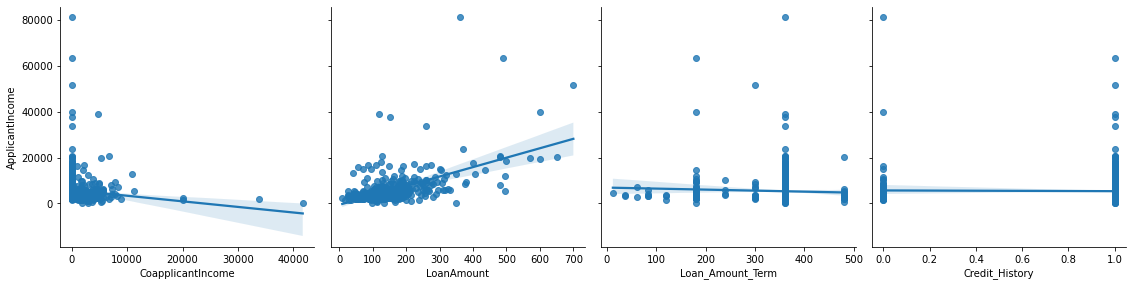

In [49]:
sns.pairplot(df, x_vars=['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History'], y_vars='ApplicantIncome', size=4, aspect=1, kind='reg')


<AxesSubplot:>

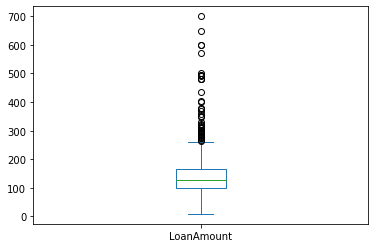

In [50]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

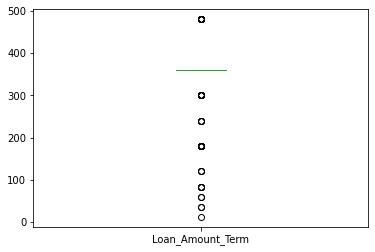

In [53]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

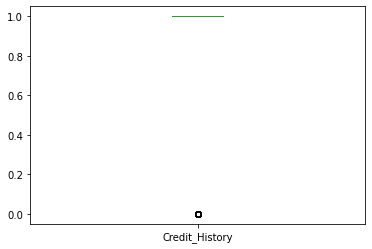

In [51]:
df['Credit_History'].plot.box()

The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as Loan amount, loan amount term , credit history.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

<AxesSubplot:xlabel='count', ylabel='Gender'>

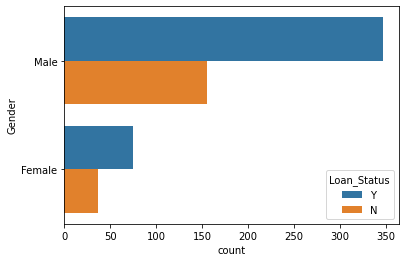

In [54]:
sns.countplot(y='Gender', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Married'>

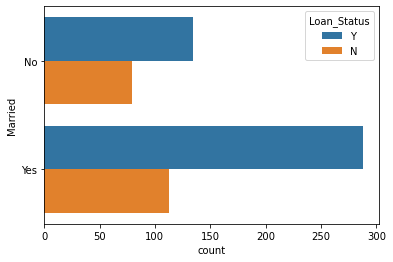

In [55]:
sns.countplot(y='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Dependents'>

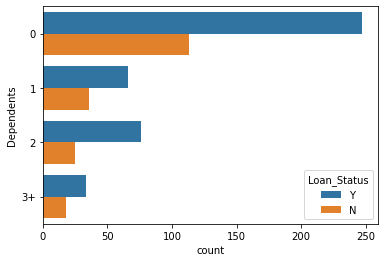

In [56]:
sns.countplot(y='Dependents', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Education'>

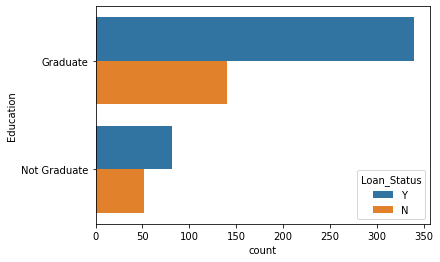

In [57]:
sns.countplot(y='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

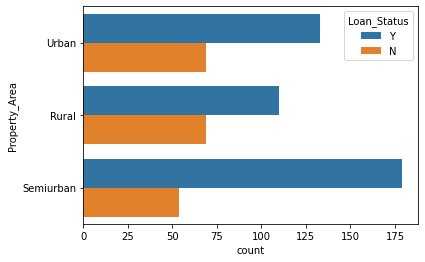

In [58]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

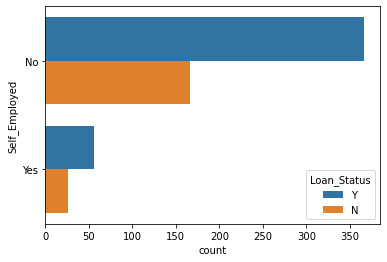

In [59]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=df)

# Label Encoder

In [60]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Removing Columns


In [61]:
#Removing loan id , which is of no use here in this data ...:
df.drop("Loan_ID", axis=1,inplace=True)

In [62]:
df.drop("CoapplicantIncome", axis=1,inplace=True)

Removing CoapplicantIncome column as we can see that this field is showing a negative relationship with other fields such as Applicants income , which may affect out data with the prediction.

In [63]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,141.0,360.0,1.0,2,1


In [64]:
df.shape

(614, 11)

# Removing Outliers:

In [65]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(614, 11)


In [66]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(582, 11)


# Assigning X AND Y Variables:


In [67]:
x=df1.iloc[:,:10]
x.shape

(582, 10)

In [68]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,141.0,360.0,1.0,2


In [69]:
y=df1.iloc[:,-1:]
y.shape

(582, 1)

In [70]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# Using Standard Scaler:

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.477334,-1.356106,-0.725576,-0.538949,-0.381666,0.399209,-0.141393,0.233693,0.416398,1.221805
1,0.477334,0.737405,0.277477,-0.538949,-0.381666,-0.025464,-0.141393,0.233693,0.416398,-1.313277
2,0.477334,0.737405,-0.725576,-0.538949,2.620089,-0.556474,-1.220047,0.233693,0.416398,1.221805
3,0.477334,0.737405,-0.725576,1.855464,-0.381666,-0.696355,-0.280574,0.233693,0.416398,1.221805
4,0.477334,-1.356106,-0.725576,-0.538949,-0.381666,0.449861,0.084776,0.233693,0.416398,1.221805


# Model Selection

In [73]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.2938054621730052
r2_score corresponding to random state:  43 is:  0.3578290137898885
r2_score corresponding to random state:  44 is:  0.3817619450132739
r2_score corresponding to random state:  45 is:  0.3350268603917602
r2_score corresponding to random state:  46 is:  0.368092093717335
r2_score corresponding to random state:  47 is:  0.2212348399572135
r2_score corresponding to random state:  48 is:  0.2720985611070813
r2_score corresponding to random state:  49 is:  0.30543556986152187
r2_score corresponding to random state:  50 is:  0.3092039959915557
r2_score corresponding to random state:  51 is:  0.2681276005718706
r2_score corresponding to random state:  52 is:  0.2650589276525197
r2_score corresponding to random state:  53 is:  0.2681827442903659
r2_score corresponding to random state:  54 is:  0.32352588527365966
r2_score corresponding to random state:  55 is:  0.2709575271097632
r2_score corresponding to random state:  56 is:

# Lasso:

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [75]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)


r2_score corresponding to random state:  42 is:  0.3020187361673381
r2_score corresponding to random state:  43 is:  0.35900869494816234
r2_score corresponding to random state:  44 is:  0.3873924719553904
r2_score corresponding to random state:  45 is:  0.3424198400102565
r2_score corresponding to random state:  46 is:  0.379223867380872
r2_score corresponding to random state:  47 is:  0.2263884598332745
r2_score corresponding to random state:  48 is:  0.2680571131781919
r2_score corresponding to random state:  49 is:  0.3183318036300581
r2_score corresponding to random state:  50 is:  0.3040296813120881
r2_score corresponding to random state:  51 is:  0.28442383867111454
r2_score corresponding to random state:  52 is:  0.28186445952973516
r2_score corresponding to random state:  53 is:  0.27636167088073116
r2_score corresponding to random state:  54 is:  0.3250741189989018
r2_score corresponding to random state:  55 is:  0.3042897387411482
r2_score corresponding to random state:  56 i

# Logistic Regression ,Gaussian NB,SVC,Decision Tree Classifier,KNeighbors Classifier




In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [77]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(465, 10) (117, 10)
(465, 1) (117, 1)


In [78]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [79]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression()


ACCURACY SCORE IS =  0.8632478632478633


CROSS_VAL_SCORE =  0.8110169491525424


ROC_AUC_SCORE =  0.7983108108108108


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.85      0.97      0.91        80

    accuracy                           0.86       117
   macro avg       0.88      0.80      0.82       117
weighted avg       0.87      0.86      0.85       117



CONFUSION MATRIX [[23 14]
 [ 2 78]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


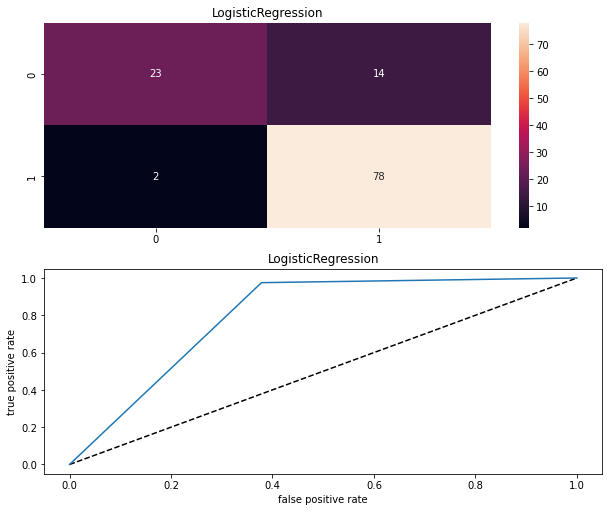




**************** GaussianNB ****************


GaussianNB()


ACCURACY SCORE IS =  0.8632478632478633


CROSS_VAL_SCORE =  0.8092928112215079


ROC_AUC_SCORE =  0.7983108108108108


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.85      0.97      0.91        80

    accuracy                           0.86       117
   macro avg       0.88      0.80      0.82       117
weighted avg       0.87      0.86      0.85       117



CONFUSION MATRIX [[23 14]
 [ 2 78]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


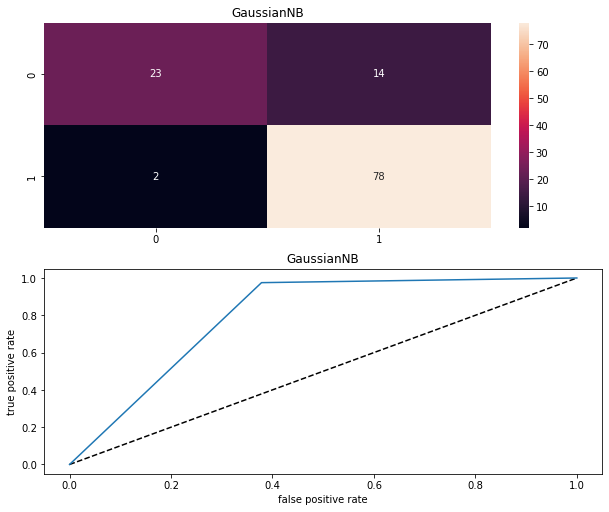




**************** SVC ****************


SVC()


ACCURACY SCORE IS =  0.8547008547008547


CROSS_VAL_SCORE =  0.8109877264757452


ROC_AUC_SCORE =  0.7920608108108108


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.62      0.73        37
           1       0.85      0.96      0.90        80

    accuracy                           0.85       117
   macro avg       0.87      0.79      0.82       117
weighted avg       0.86      0.85      0.85       117



CONFUSION MATRIX [[23 14]
 [ 3 77]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


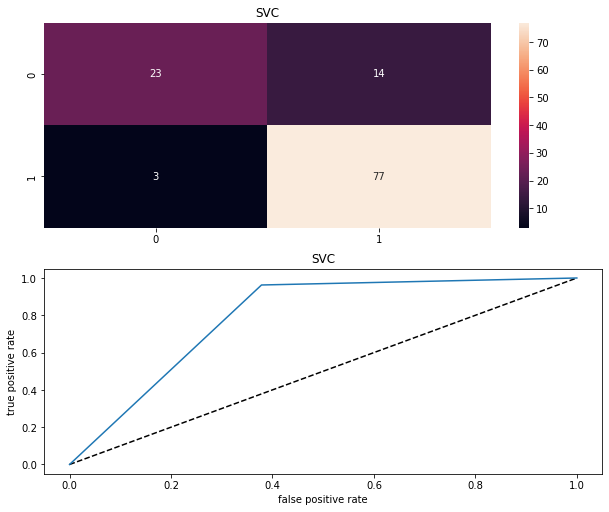




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(random_state=10)


ACCURACY SCORE IS =  0.7350427350427351


CROSS_VAL_SCORE =  0.7165692577440093


ROC_AUC_SCORE =  0.7045608108108108


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.57      0.62      0.60        37
           1       0.82      0.79      0.80        80

    accuracy                           0.74       117
   macro avg       0.70      0.70      0.70       117
weighted avg       0.74      0.74      0.74       117



CONFUSION MATRIX [[23 14]
 [17 63]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


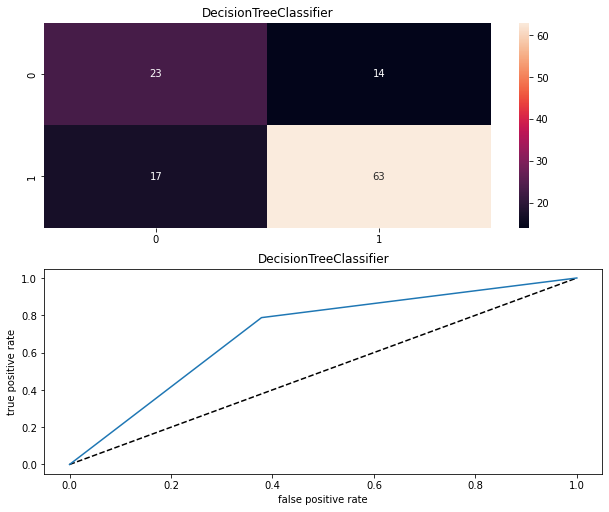




**************** KNeighborsClassifie ****************


KNeighborsClassifier()


ACCURACY SCORE IS =  0.8547008547008547


CROSS_VAL_SCORE =  0.7782875511396844


ROC_AUC_SCORE =  0.7920608108108108


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.62      0.73        37
           1       0.85      0.96      0.90        80

    accuracy                           0.85       117
   macro avg       0.87      0.79      0.82       117
weighted avg       0.86      0.85      0.85       117



CONFUSION MATRIX [[23 14]
 [ 3 77]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


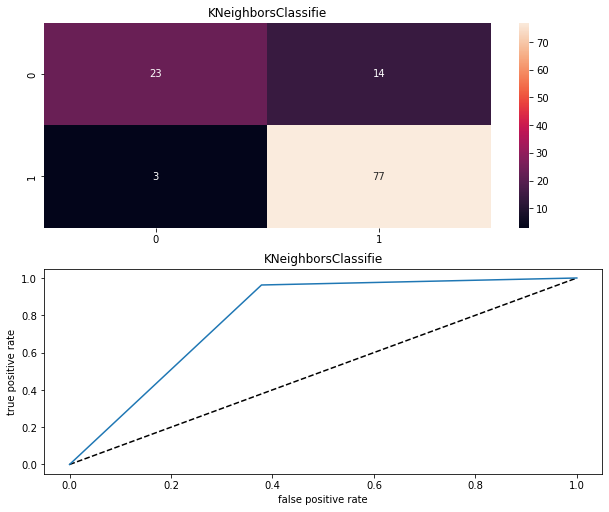

In [80]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results:

In [81]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,86.324786,81.101695,79.831081
1,GaussianNB,86.324786,80.929281,79.831081
2,SVC,85.470085,81.098773,79.206081
3,DecisionTreeClassifier,73.504274,71.656926,70.456081
4,KNeighborsClassifie,85.470085,77.828755,79.206081


The Logistic Regression model, which is performing the best for the given dataset.

In [82]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.4708984749809715
Mean Squared error :  0.32414827726497936
RMSE is :  0.5693402122325274


When your accuracy score is not up to the mark and in oreder to increase the accuracy scor we are going to use here RANDOM FOREST REGRESSOR & CLASSIFIER in order to increase the score for the above tests. The boosting and bagging techniques will re enable or boost the internal parameters inorder to increse the accuracy score of the model.

In [84]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 50}

In [85]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=80,stratify=y)
rfr=RandomForestRegressor(bootstrap=True,max_features='sqrt',min_samples_split=2,n_estimators=100)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.903305878816507

In [86]:
pred

array([0.97, 0.94, 0.83, 0.84, 0.89, 0.9 , 0.07, 0.95, 1.  , 0.92, 0.06,
       0.7 , 0.79, 0.95, 0.04, 0.95, 0.3 , 0.79, 0.94, 0.73, 0.97, 0.86,
       0.75, 0.95, 0.54, 0.54, 0.04, 0.87, 0.64, 0.92, 0.88, 0.9 , 0.93,
       0.91, 0.95, 0.71, 0.97, 0.01, 0.92, 0.91, 0.7 , 0.93, 0.85, 0.02,
       0.72, 0.37, 0.73, 0.95, 0.04, 0.12, 0.69, 0.12, 0.8 , 0.55, 0.93,
       0.6 , 0.72, 0.77, 0.66, 0.7 , 0.82, 0.83, 0.88, 0.28, 0.73, 0.8 ,
       0.07, 0.83, 0.74, 0.78, 0.65, 0.03, 0.95, 0.36, 0.94, 0.05, 0.9 ,
       0.04, 0.64, 0.83, 0.06, 0.96, 0.04, 0.8 , 0.91, 0.85, 0.17, 0.74,
       0.68, 0.75, 0.02, 0.81, 0.07, 0.61, 0.64, 0.4 , 0.8 , 0.76, 0.84,
       0.9 , 0.93, 0.86, 0.6 , 0.94, 0.61, 0.38, 0.95, 0.81, 0.78, 0.8 ,
       0.05, 0.68, 0.66, 0.58, 0.93, 0.06, 0.97])

Random Forest Classifier:

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators = 100)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

In [88]:
pred_2

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1])

# Choosing A Model


Random Forest Regressor (rfr)

From the Exploratory data Analysis and the Various models tried abve we could see that among all the prediction Logistic Regression is doing good but if we have to choose the best then I am here going to choose Random Forest Regressor as the prediction of the score here is +90 % .

Through this model we will be able to predict the wheather to provide the loan to a person or not.